# Data preproc

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import seaborn as sns
%config InlineBackend.figure_format = 'svg'


In [2]:
DATA_URL = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/"

In [3]:
df = pd.read_csv(DATA_URL + "telecom_churn.csv")

In [4]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [5]:
X = df.drop(["Churn", "State"], axis=1)
X["International plan"] = X["International plan"].map({"Yes": 1, "No": 0})
X["Voice mail plan"] = X["Voice mail plan"].map({"Yes": 1, "No": 0})

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
X_scaled

array([[ 0.67648946, -0.52360328, -0.32758048, ..., -0.60119509,
        -0.0856905 , -0.42793202],
       [ 0.14906505, -0.52360328, -0.32758048, ..., -0.60119509,
         1.2411686 , -0.42793202],
       [ 0.9025285 , -0.52360328, -0.32758048, ...,  0.21153386,
         0.69715637, -1.1882185 ],
       ...,
       [-1.83505538,  1.71881732, -0.32758048, ...,  0.61789834,
         1.3871231 ,  0.33235445],
       [ 2.08295458,  1.71881732,  3.05268496, ...,  2.24335625,
        -1.87695028,  0.33235445],
       [-0.67974475, -0.52360328, -0.32758048, ..., -0.19483061,
         1.2411686 , -1.1882185 ]])

# T-SNE

In [ ]:
%%time

tsne = TSNE(random_state=17)
tsne_repr = tsne.fit_transform(X_scaled)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


CPU times: user 47.2 s, sys: 245 ms, total: 47.4 s
Wall time: 24.9 s


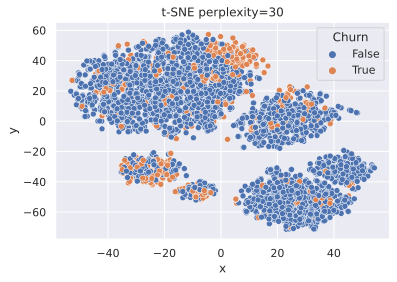

In [ ]:
tsne_df = pd.DataFrame(tsne_repr, columns=["x", "y"])
tsne_df['Churn'] = df['Churn']

sns.scatterplot(x="x", y="y", data=tsne_df, hue="Churn").set(title='t-SNE perplexity=30')
plt.show()

In [ ]:
%%time
tsne = TSNE(random_state=123, n_components=2, perplexity=5)
tsne_repr = tsne.fit_transform(X_scaled)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


CPU times: user 41.4 s, sys: 388 ms, total: 41.8 s
Wall time: 26.2 s


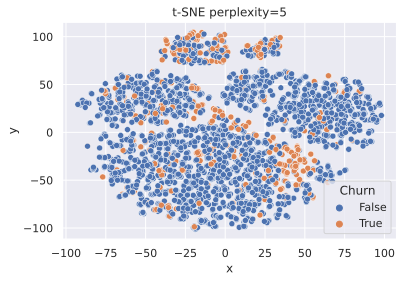

In [ ]:
tsne_df = pd.DataFrame(tsne_repr, columns=["x", "y"])
tsne_df['Churn'] = df['Churn']

sns.scatterplot(x="x", y="y", data=tsne_df, hue="Churn").set(title='t-SNE perplexity=5')
plt.show()

In [ ]:
%%time
tsne = TSNE(random_state=123, n_components=2, perplexity=50)
tsne_repr = tsne.fit_transform(X_scaled)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


CPU times: user 1min 1s, sys: 368 ms, total: 1min 1s
Wall time: 32 s


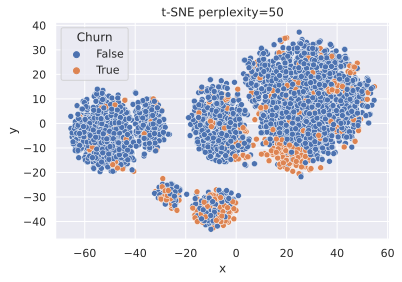

In [ ]:
tsne_df = pd.DataFrame(tsne_repr, columns=["x", "y"])
tsne_df['Churn'] = df['Churn']

sns.scatterplot(x="x", y="y", data=tsne_df, hue="Churn").set(title='t-SNE perplexity=50')
plt.show()

# UMAP

In [ ]:
!pip install umap-learn

In [ ]:
import umap

In [ ]:
def draw_umap(n_neighbors=15, min_dist=0.1, n_components=2, metric='euclidean', title=''):
    fit = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=n_components,
        metric=metric
    )
    u = fit.fit_transform(X_scaled);

    u_df = pd.DataFrame(u, columns=["x", "y"])
    u_df['Churn'] = df['Churn'] 

    sns.scatterplot(x="x", y="y", data=u_df, hue="Churn").set(title=title)
    plt.show()

In [ ]:
import itertools
params = [[5, 25, 50], [0.1, 0.6]]
for n, dist in itertools.product(*params):
    print(n, dist)

5 0.1
5 0.6
25 0.1
25 0.6
50 0.1
50 0.6


In [ ]:
for n, dist in itertools.product(*params):
    draw_umap(n_neighbors=n, min_dist=dist, title=f'n_neighbors = {n}, min_dist = {dist}')

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
%%time
reducer = umap.UMAP()
embedding = reducer.fit_transform(X_scaled)
embedding.shape

CPU times: user 23.3 s, sys: 199 ms, total: 23.5 s
Wall time: 20.5 s


(3333, 2)

[]

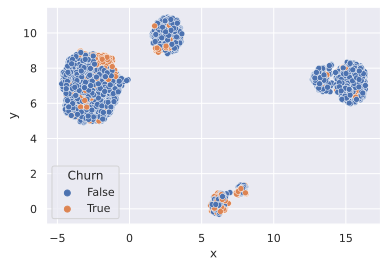

In [ ]:
embedding_df = pd.DataFrame(embedding, columns=["x", "y"])
embedding_df['Churn'] = df['Churn'] 

sns.scatterplot(x="x", y="y", data=embedding_df, hue="Churn").plot()